# Task 1: Abalone Analysis 
#### by Arno Dunstatter (1926976)



# Importing Abalone Data Set and showing it

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

ab = pd.read_csv("abalone.csv", sep =',')
ab

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,O
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Y
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,M
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,M
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Y
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,M
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,M
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,M
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,M


In [3]:
ab.describe().loc[["mean","std"],:]

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169


# Covariance Matrix of the Length, Diameter, Shucked Weight and Rings

In [4]:
#We only want Length, Diameter, Shcuked Weight, and Rings
abSelectCols = ab.loc[:,["Length","Diameter","Shucked Weight","Rings"]]
abSelectCols.style.set_caption("Covariance Matrix")
abSelectCols.cov()

,Length,Diameter,Shucked Weight,Rings
Length,0.014422,0.011761,0.023935,0.215562
Diameter,0.011761,0.009849,0.019674,0.183872
Shucked Weight,0.023935,0.019674,0.049268,0.301204
Rings,0.215562,0.183872,0.301204,10.395266


# Correlations of the Length, Diameter, Shucked Weight and Rings

In [5]:
abSelectCols.corr()

,Length,Diameter,Shucked Weight,Rings
Length,1.000000,0.986812,0.897914,0.556720
Diameter,0.986812,1.000000,0.893162,0.574660
Shucked Weight,0.897914,0.893162,1.000000,0.420884
Rings,0.556720,0.574660,0.420884,1.000000


### Interpretation of Covariances and Correlations: 

All pairs of variables show positive covariances and correlations, therefore there is a positive relationship between them all. 

There were three strong correlations and they are as follows, listed in descending order: 
Diameter/Length, Shucked Weight/Length, Shucked Weight/Diameter.

There were two moderate correlations and they are as follows, listed in descending order: 
Rings/Length, Rings/Diameter

There was one weak correlation: 
Rings/Shucked Weight  


***






# The Scatter Plot for Shell Weight and Length 


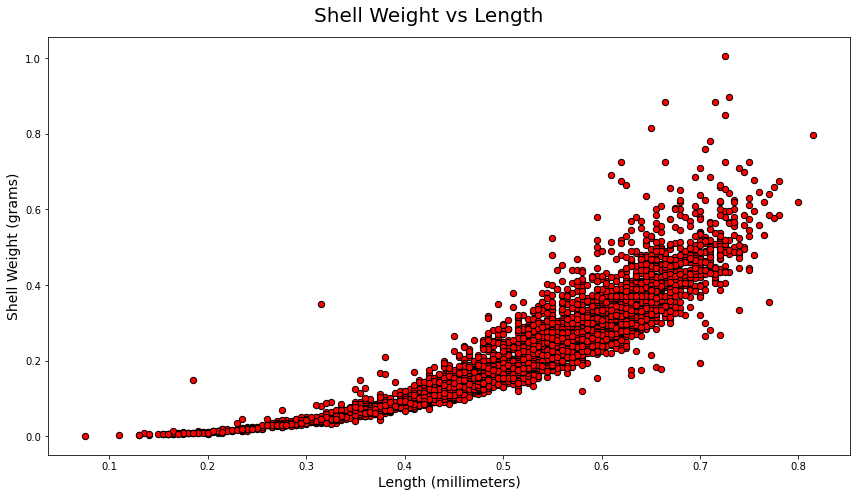

In [6]:
#3.	Create a scatter plot for the Shell weight and Length of your dataset. Interpret the scatter plot! 3 points
#scatterPlot_ShellW_Len = ab.plot.scatter(y = "Shell Weight", x = "Length", c = "red", ec = "black")

ab_SW = ab["Shell Weight"]
ab_L = ab["Length"]
fig, axs = plt.subplots()
axs.scatter(x=ab_L, y=ab_SW, c = "red", ec = "black", s = 40)
axs.set_xlabel("Length (millimeters)", size = 14)
axs.set_ylabel("Shell Weight (grams)", size = 14)

fig.suptitle("Shell Weight vs Length", size = 20)
fig.set_size_inches(12,7)
fig.tight_layout() #fixes spacing between subplots


### Scatter Plot Interpretation
This scatter plot shows a positive, non-linear relationship between the Length and the Shell Weight in this sample of Abalone
***
# Histograms for Diameter, Whole Weight, and Rings, for Abalone 

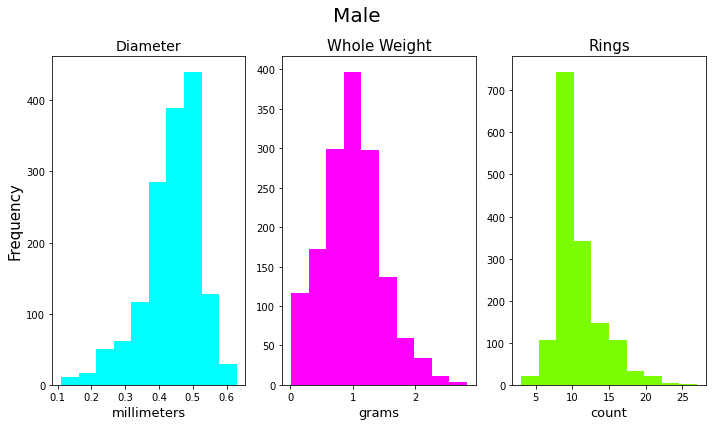

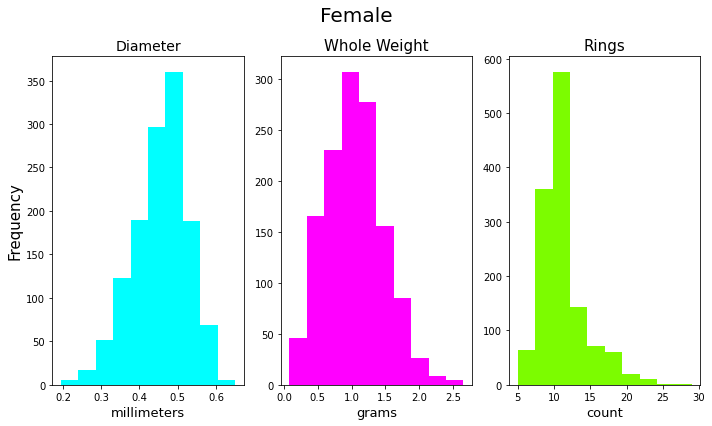

In [7]:
#first we split the data
#we can use the query function
#abMale = ab.query("Sex == 'M'")

#or we can use pandasql's sqldf function to feed in sql queries
from pandasql import sqldf

width, height = 10, 6 #for sizing the two figures below

#first we'll do the male data
abMale = sqldf("select * from ab where Sex = 'M';") #selects male data
fig, axs = plt.subplots(1,3) #defines our figure and it's axes, 1 row, 3 cols

axs[0].hist(x = abMale["Diameter"], color = 'cyan')
axs[0].set_title("Diameter", size = 14)
axs[0].set_ylabel("Frequency", size = 15)
axs[0].set_xlabel("millimeters", size = 13)

axs[1].hist(x = abMale["Whole Weight"], color = 'magenta')
axs[1].set_title("Whole Weight", size = 15)
axs[1].set_xlabel("grams", size = 13)

axs[2].hist(x = abMale["Rings"], color = 'lawngreen')
axs[2].set_title("Rings", size = 15)
axs[2].set_xlabel("count", size = 13)

fig.suptitle("Male", size = 20)
fig.set_size_inches(width, height)
fig.tight_layout() #fixes spacing between subplots


#now for female
abFemale = ab.query("Sex == 'F'")
fig, axs = plt.subplots(1,3) #defines our figure and it's axes, 1 row, 3 cols
axs[0].hist(x = abFemale["Diameter"], color = 'cyan')
axs[0].set_title("Diameter", size = 14)
axs[0].set_ylabel("Frequency", size = 15)
axs[0].set_xlabel("millimeters", size = 13)

axs[1].hist(x = abFemale["Whole Weight"], color = 'magenta')
axs[1].set_title("Whole Weight", size = 15)
axs[1].set_xlabel("grams", size = 13)

axs[2].hist(x = abFemale["Rings"], color = 'lawngreen')
axs[2].set_title("Rings", size = 15)
axs[2].set_xlabel("count", size = 13)

fig.suptitle("Female", size = 20)
fig.set_size_inches(width, height)
fig.tight_layout() #fixes spacing between subplots







### Histogram Interpretation:
Diameter distribution: Both male and female subsamples are left-skewed.

Whole Weight distribution: Both male and female subsamples are right-skewed.

Rings distribution: Both male and female subsamples are right-skewed

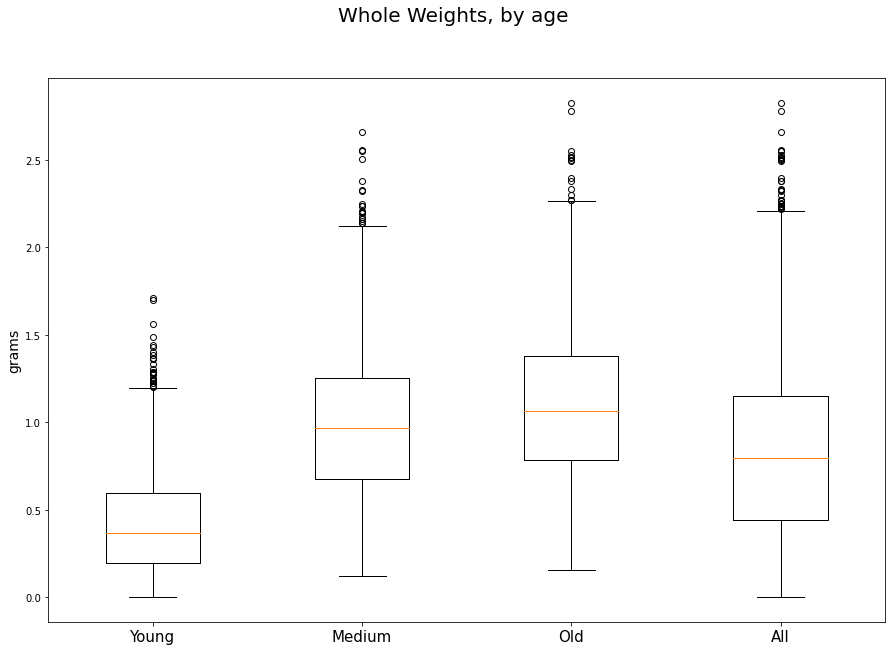

In [8]:
#first we make our subsets
#we can use a .query() followed by a 
abO = ab.query("Age == 'O'")
abO_WW = abO["Whole Weight"]
abM = ab.query("Age == 'M'")
abM_WW = abM["Whole Weight"]
# #alternatively we could use the .sqldf() function from the pdsql library to make our selection
# #this method re-indexes all the data
# abY_WW = sqldf("select `Whole Weight` from ab where Age = 'Y';")
abY = ab.query("Age == 'Y'")
abY_WW = abY["Whole Weight"]
ab_WW = ab["Whole Weight"]



# could do them all as subplots, but then their differences in weight distribution wont be as apparent
# #now we make our subplots
# fig, axs = plt.subplots(1,4)
# axs[0].boxplot(abY_WW)
# axs[0].set_title("Young", size = 15)
# axs[0].set_ylabel("grams", size = 14)

# axs[1].boxplot(abM_WW)
# axs[1].set_title("Middle", size = 15)

# axs[2].boxplot(abO_WW)
# axs[2].set_title("Old", size = 15)

# axs[3].boxplot(ab_WW)
# axs[3].set_title("All", size = 15)

# fig.suptitle("Whole Weights, by age", size = 20)
# #FIGURE OUT HOW TO RESIZE THE WHOLE FIGURE
# fig.set_size_inches(10,6)
# fig.tight_layout() #fixes spacing between subplots



#instead do them as multiple boxplots on one axes
abYMOA_WW = [abY_WW, abM_WW, abO_WW, ab_WW] #aggregate data into one frame
fig, axs = plt.subplots() #establish our figure and axes (default parameters: (1,1,1))
axs.set_ylabel("grams", size = 14)
axs.boxplot(abYMOA_WW, labels = ["Young", "Medium", "Old", "All"]) #creates the boxplot, sets the labels of the x-ticks
for tick in axs.xaxis.get_major_ticks(): #adjusts font size of the labels of x-ticks
    tick.label.set_fontsize(15)
fig.suptitle("Whole Weights, by age", size = 20) #sets figure title
fig.set_size_inches(15,10) #adjusts figure size



### Boxplot interpretation:
All four boxplots are roughly symmetric around their median, but with all outliers falling upwards of the bulk of the sample, and with a slight positive skew in the Young subsample. 
The Young subsample's IQR has no overlap at all with either the Medium or Old subsamples', instead falling entirely below them both, while the Medium and Old subsamples' IQRs have a great deal of overlap, albeit with the Old subsample's IQR being slightly shifted upwards relative to the Medium subsample. All of this indicates that Abalone grow a lot from their youth into their adulthood, and while growth continues into their old age, it slows down relative to the growth between their youth and their adulthood. 
As expected, the boxplot representing the whole sample has the largest IQR and the largest whisker range.

***
# Supervised Scatter Plots

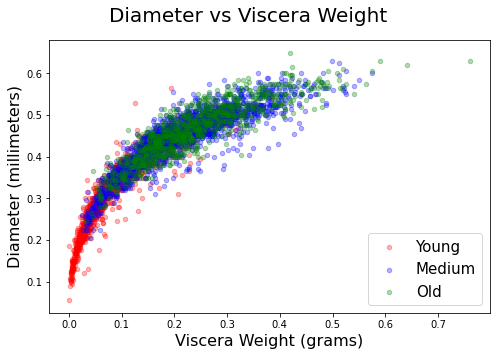

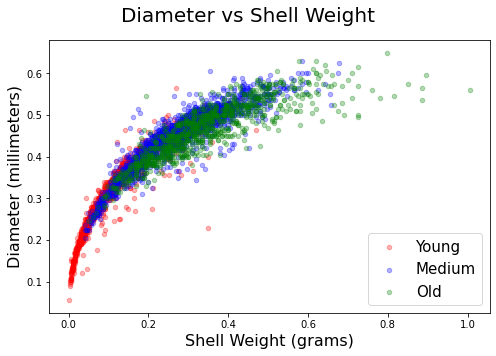

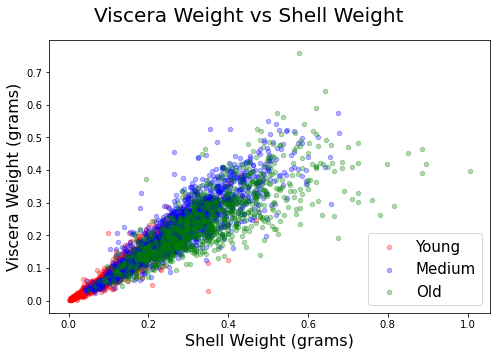

In [9]:
#Create supervised scatter plots/supervised density plots for the following 3 pairs of attributes
#using the Age attribute as a class variable: Diameter&Viscera Weight, Diameter&Shell Weight,
#and Viscera Weight& Shell Weight. Use different colors for the class variable. 
#Interpret the obtained plots; in particular address what can be said about the difficulty 
#in predicting the correct age class and the distribution of the instances of the three classes. 

#here are some parameters shared across all three figures
big = False
if big:
    figSize = (14,10) #to hange fig sizes quickly (width, height) #(14,7) is a good big size, (7,5) is a good small size
    pointSize = 40
    alphaValue = 0.6
else:
    figSize = (7,5) #to hange fig sizes quickly (width, height) #(14,7) is a good big size, (7,5) is a good small size
    pointSize = 20
    alphaValue = 0.3
colors = ['red','blue','green']

#Diameter vs Viscera Weight
#get data for Diameter and Viscera Weight, categorized by age
abY_D = sqldf("select Diameter from ab where Age = 'Y';")
abY_VW = sqldf("select `Viscera Weight` from ab where Age = 'Y';")
#Medium subSamples
abM_D = sqldf("select Diameter from ab where Age = 'M';")
abM_VW = sqldf("select `Viscera Weight` from ab where Age = 'M';")
#Old subSamples
abO_D = sqldf("select Diameter from ab where Age = 'O';")
abO_VW = sqldf("select `Viscera Weight` from ab where Age = 'O';")

#now we make our figure and axis
fig, axs = plt.subplots()
scatter_abY_D_VW = axs.scatter(x = abY_VW, y = abY_D, color = colors[0], s = pointSize, alpha = alphaValue)
scatter_abM_D_VW = axs.scatter(x = abM_VW, y = abM_D, color = colors[1], s = pointSize, alpha = alphaValue)
scatter_abO_D_VW = axs.scatter(x = abO_VW, y = abO_D, color = colors[2], s = pointSize, alpha = alphaValue)
#now we add axis labels
axs.set_ylabel("Diameter (millimeters)", size = 16)
axs.set_xlabel("Viscera Weight (grams)", size = 16)
#now we need to get our legend set up
legendHandles, legendLabels = (scatter_abY_D_VW, scatter_abM_D_VW, scatter_abO_D_VW), ("Young","Medium","Old") 
axs.legend(legendHandles, legendLabels, loc = "lower right", fontsize = 15) #sets up our legend
#adjust the figure
fig.suptitle("Diameter vs Viscera Weight", size = 20)
fig.set_size_inches(figSize[0],figSize[1]) #adjusts figure size
fig.tight_layout() #fixes spacing between subplots



#Diameter vs Shell Weight
#get data for Diameter and Shell Weight, categorized by age
    #already have Diameter data from above, just need SW data
abY_SW = sqldf("select `Shell Weight` from ab where Age = 'Y';")
abM_SW = sqldf("select `Shell Weight` from ab where Age = 'M';")
abO_SW = sqldf("select `Shell Weight` from ab where Age = 'O';")

#now we make our figure and axis
fig, axs = plt.subplots()
#pointSize from above
#alphaValue from above
#colors from above
scatter_abY_D_SW = axs.scatter(x = abY_SW, y = abY_D, color = colors[0], s = pointSize, alpha = alphaValue)
scatter_abM_D_SW = axs.scatter(x = abM_SW, y = abM_D, color = colors[1], s = pointSize, alpha = alphaValue)
scatter_abO_D_SW = axs.scatter(x = abO_SW, y = abO_D, color = colors[2], s = pointSize, alpha = alphaValue)
#now we add axis labels
axs.set_ylabel("Diameter (millimeters)", size = 16)
axs.set_xlabel("Shell Weight (grams)", size = 16)
#now we need to get our legend set up
legendHandles, legendLabels = (scatter_abY_D_SW, scatter_abM_D_SW, scatter_abO_D_SW), ("Young","Medium","Old") 
axs.legend(legendHandles, legendLabels, loc = "lower right", fontsize = 15) #sets up our legend
#adjust the figure
fig.suptitle("Diameter vs Shell Weight", size = 20)
fig.set_size_inches(figSize[0],figSize[1]) #adjusts figure size
fig.tight_layout() #fixes spacing between subplots



#Viscera Weight vs Shell Weight
#get data for Viscera Weight and Shell Weight, categorized by age
    #already have both from above
#now we make our figure and axis
fig, axs = plt.subplots()
#pointSize from above
#alphaValue from above
#colors from above
scatter_abY_VW_SW = axs.scatter(x = abY_SW, y = abY_VW, color = colors[0], s = pointSize, alpha = alphaValue)
scatter_abM_VW_SW = axs.scatter(x = abM_SW, y = abM_VW, color = colors[1], s = pointSize, alpha = alphaValue)
scatter_abO_VW_SW = axs.scatter(x = abO_SW, y = abO_VW, color = colors[2], s = pointSize, alpha = alphaValue)
#now we add axis labels
axs.set_ylabel("Viscera Weight (grams)", size = 16)
axs.set_xlabel("Shell Weight (grams)", size = 16)
#now we need to get our legend set up
legendHandles, legendLabels = (scatter_abY_VW_SW, scatter_abM_VW_SW, scatter_abO_VW_SW), ("Young","Medium","Old") 
axs.legend(legendHandles, legendLabels, loc = "lower right", fontsize = 15) #sets up our legend
#adjust the figure
fig.suptitle("Viscera Weight vs Shell Weight", size = 20)
fig.set_size_inches(figSize[0],figSize[1]) #adjusts figure size
fig.tight_layout() #fixes spacing between subplots



### Supervised Scatter plot Interpretation:
For all three Scatter plots the Young class is towards the lower left, the Medium class more centered, and the Old class is more shifted to the upper right. That said, there is a very high degree of overlap between all three classes, with only the Young class having a small region not shared with either of the other two classes. 

The distributions considering the Diameter show a non-linear relationships with the Weights, while the Viscera Weight has a more linear relationship with the Shell Weight.

Given the degree of overlap between the three age-classes in all three attribute pairings, predicting the correct age class, based on any single attribute pairing, would be very difficult.

***
# Density plots for Diameter vs Shell Weight


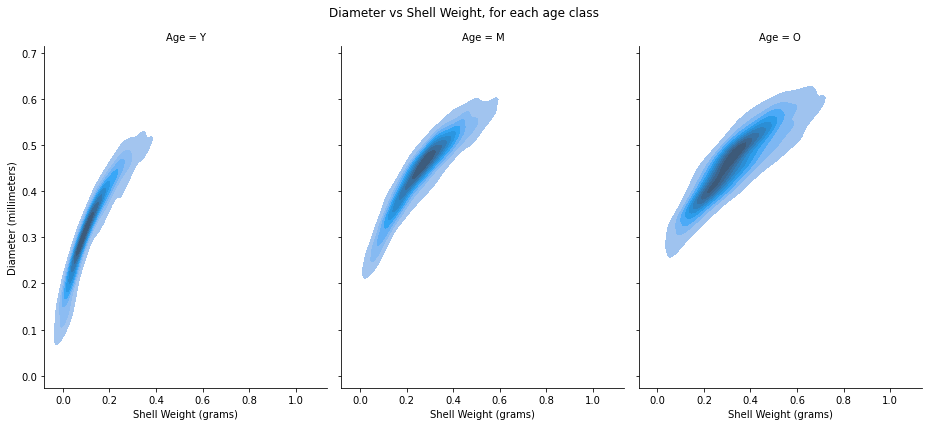

In [10]:
#7.	Create 3 density plots for the instances of the 3 age classes in the Diameter/Shell Weight space. 
#Compare the 3 density plots! 6 points

import seaborn as sb

#lets get the relevant data
ab_D_SW_A = sqldf("select Diameter, `Shell Weight`, Age from ab;")
g = sb.FacetGrid(ab_D_SW_A, col = "Age", col_order = ["Y","M","O"]) #produces the figure (facetGrid)
#g is of type <class 'seaborn.axisgrid.FacetGrid'>
#g has a fig attribute, so we can access matplotlib functions and kwargs thereby
#the next line produces (and shows) the contours via the sb.kdeplot specification
g.map_dataframe(sb.kdeplot, "Shell Weight", "Diameter", shade = True) 
g.fig.set_size_inches(13,6) #adjusts the size
g.axes[0][0].set_ylabel("Diameter (millimeters)")
g.axes[0][0].set_xlabel("Shell Weight (grams)")
g.axes[0][1].set_xlabel("Shell Weight (grams)")
g.axes[0][2].set_xlabel("Shell Weight (grams)")
g.fig.suptitle("Diameter vs Shell Weight, for each age class") #sets title
g.fig.tight_layout() #autoadjusts spacing



### Comparison:
The Young abalone have their probability density shifted to the lower left, relative to the probability densities of the Medium and Old age groups. The latter two age classes occupy much of the same region in the Diameter/Shell Weight space, albeit with the probability density of the Old age group being slighty shifted to the upper right of the space.

***
# Multiple Linear Regression

In [11]:
#8. Create a new dataset ZAbalone from the YAbalone dataset by transforming the 7 continuous attributes into z-scores. 
# Fit a linear model that predicts the Rings attribute using the 7 z-scored, continuous attributes as the independent variables.
#Report the R2 of the linear model and the coefficients of each attribute in the obtained regression function. 
#What do the obtained coefficients tell you about the importance of each attribute for predicting the number of rings of an 
#abolone? 6 points

#first we need to produce Zab (called ZAbalone in instructions)
Zab = pd.DataFrame() #initialize Zab - this table will hold ONLY z-scores of the 7 continuous attributes
#now for every continuous column (i.e. columns 1 through 7)
for col in list(ab.columns)[1:9]:
    Zab[col] = (ab[col] - ab[col].mean())/ab[col].std()
#due to the for-loop Zab is not formatted properly, so on the next line I call pd.DataFrame on it to format it
#Zab = pd.DataFrame(Zab) #the problem went away???? so i commented this line out again
print("Our Z-scores are as follows...")
display(Zab.iloc[:,1:7]) #only show 7 attributes. We have rings as the 8th column which is used as the actual_values for R^2
print() #spacing/formatting
print() #spacing/formatting



#now we have to perform the linear regression using sklearn
from sklearn import linear_model
X = Zab[list(ab.columns)[1:8]] #just the zscores for the independent variables
y = Zab[["Rings"]] #actualValues


regr = linear_model.LinearRegression() #creates regression model
regr.fit(X,y) #trains the model with our data
predictedValues = regr.predict(X) #we will use this to plot actual vs predicted values later on

#now we need our metrics
from sklearn import metrics
#first we'll get our attribute coefficients
coefs = regr.coef_
coefs = coefs[0]
attCoefs = pd.DataFrame([coefs], columns = ab.columns[1:8])
print("Multivariate Linear Regression was performed.\nThe attribute coefficients, with linear regression performed using the Z-scores, are as follows...")
display(attCoefs)
print() #spacing/formatting
print() #spacing/formatting

#now we need our R^2 (coefficients of determination)
from sklearn.metrics import r2_score
coefDet = r2_score(y, predictedValues)
print("Our R^2 value (Coefficient of Determination) is",coefDet)
print();print()
print("No plot was asked for in the instructions.")



Our Z-scores are as follows...


,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140
1,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842
2,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114
3,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222
4,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599
...,...,...,...,...,...,...
4172,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053
4173,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666
4174,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895
4175,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690




Multivariate Linear Regression was performed.
The attribute coefficients, with linear regression performed using the Z-scores, are as follows...


,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,-0.05855,0.411249,0.153419,1.406511,-1.391596,-0.334186,0.370277




Our R^2 value (Coefficient of Determination) is 0.5276299399919837


No plot was asked for in the instructions.


### Discussion:
Since the data was standardized (using Z-scoring) before the regression was performed the attribute coefficients are good stand-ins for feature importance and since none of them are 0 all 7 of them are important  for predicting the number of rings of an abalone. The degree of importance of each attribute is proportionate to the absolute value of each attribute's coefficient. 

						Tree 1


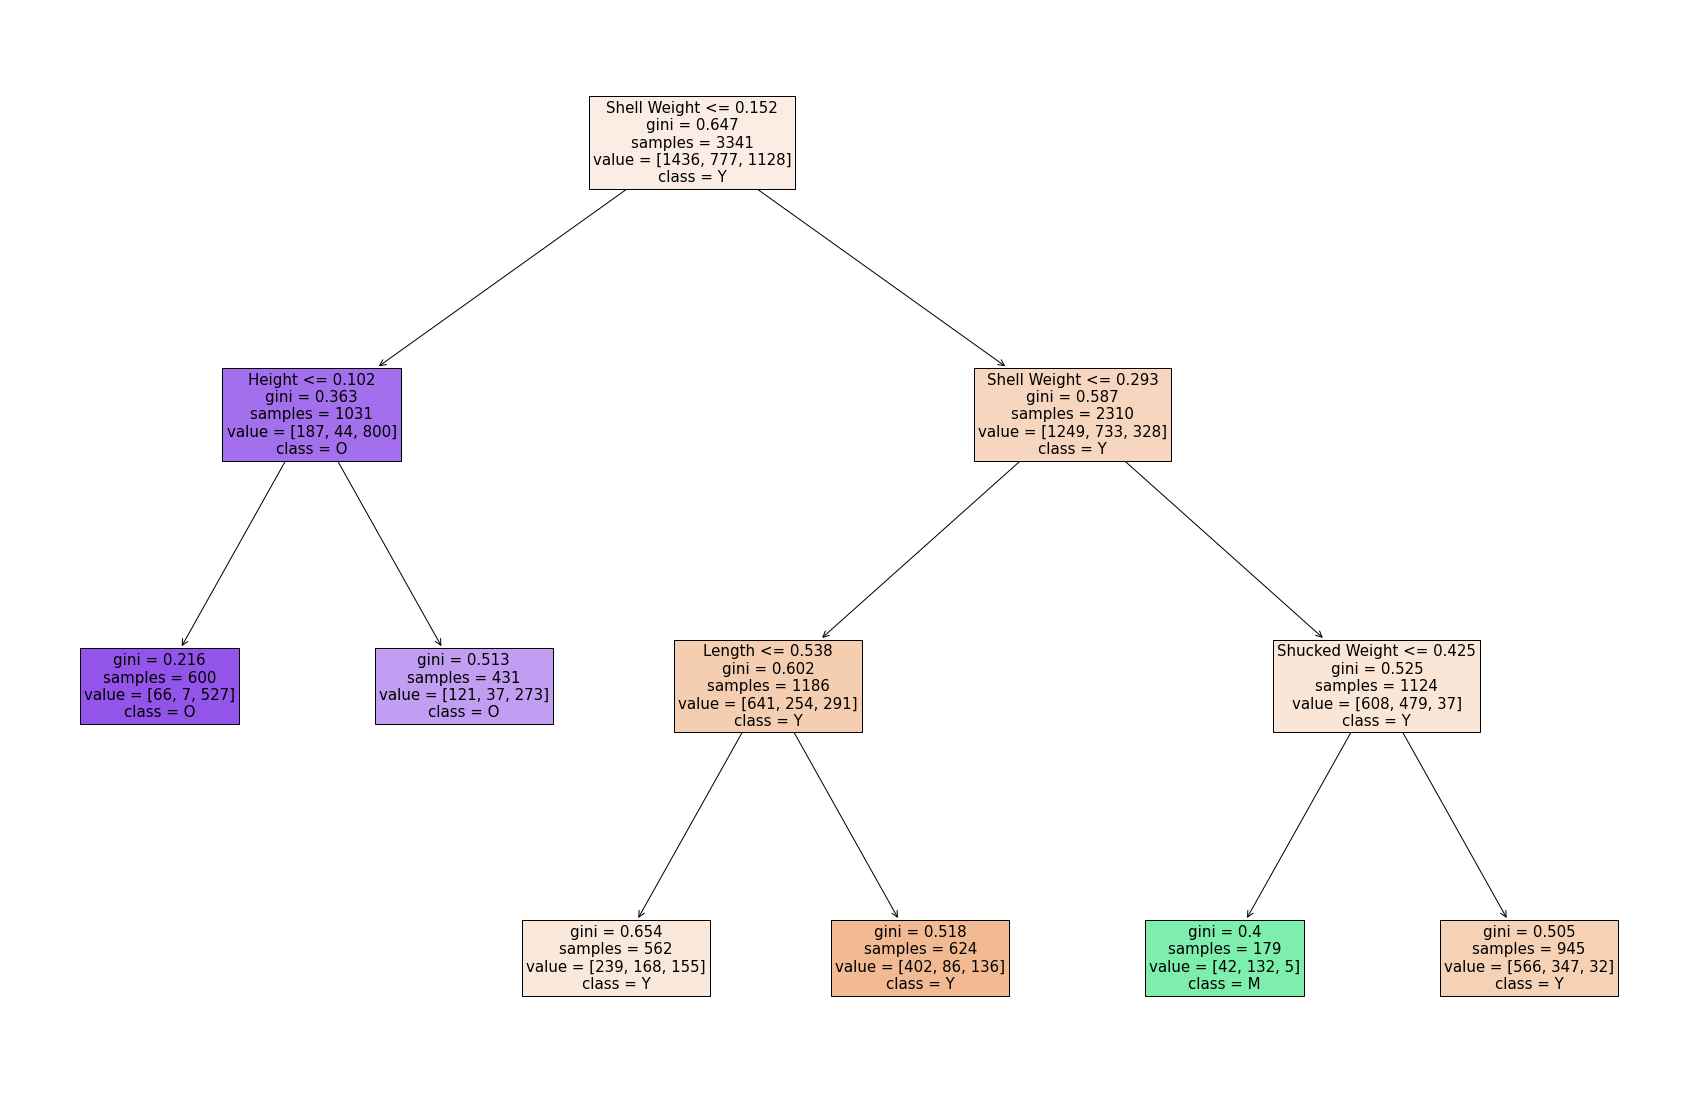

Tree 1 classification report:
              precision    recall  f1-score   support

           M       0.57      0.82      0.67       374
           O       0.70      0.17      0.27       183
           Y       0.75      0.67      0.71       279

    accuracy                           0.63       836
   macro avg       0.67      0.55      0.55       836
weighted avg       0.66      0.63      0.60       836





							  Tree 2


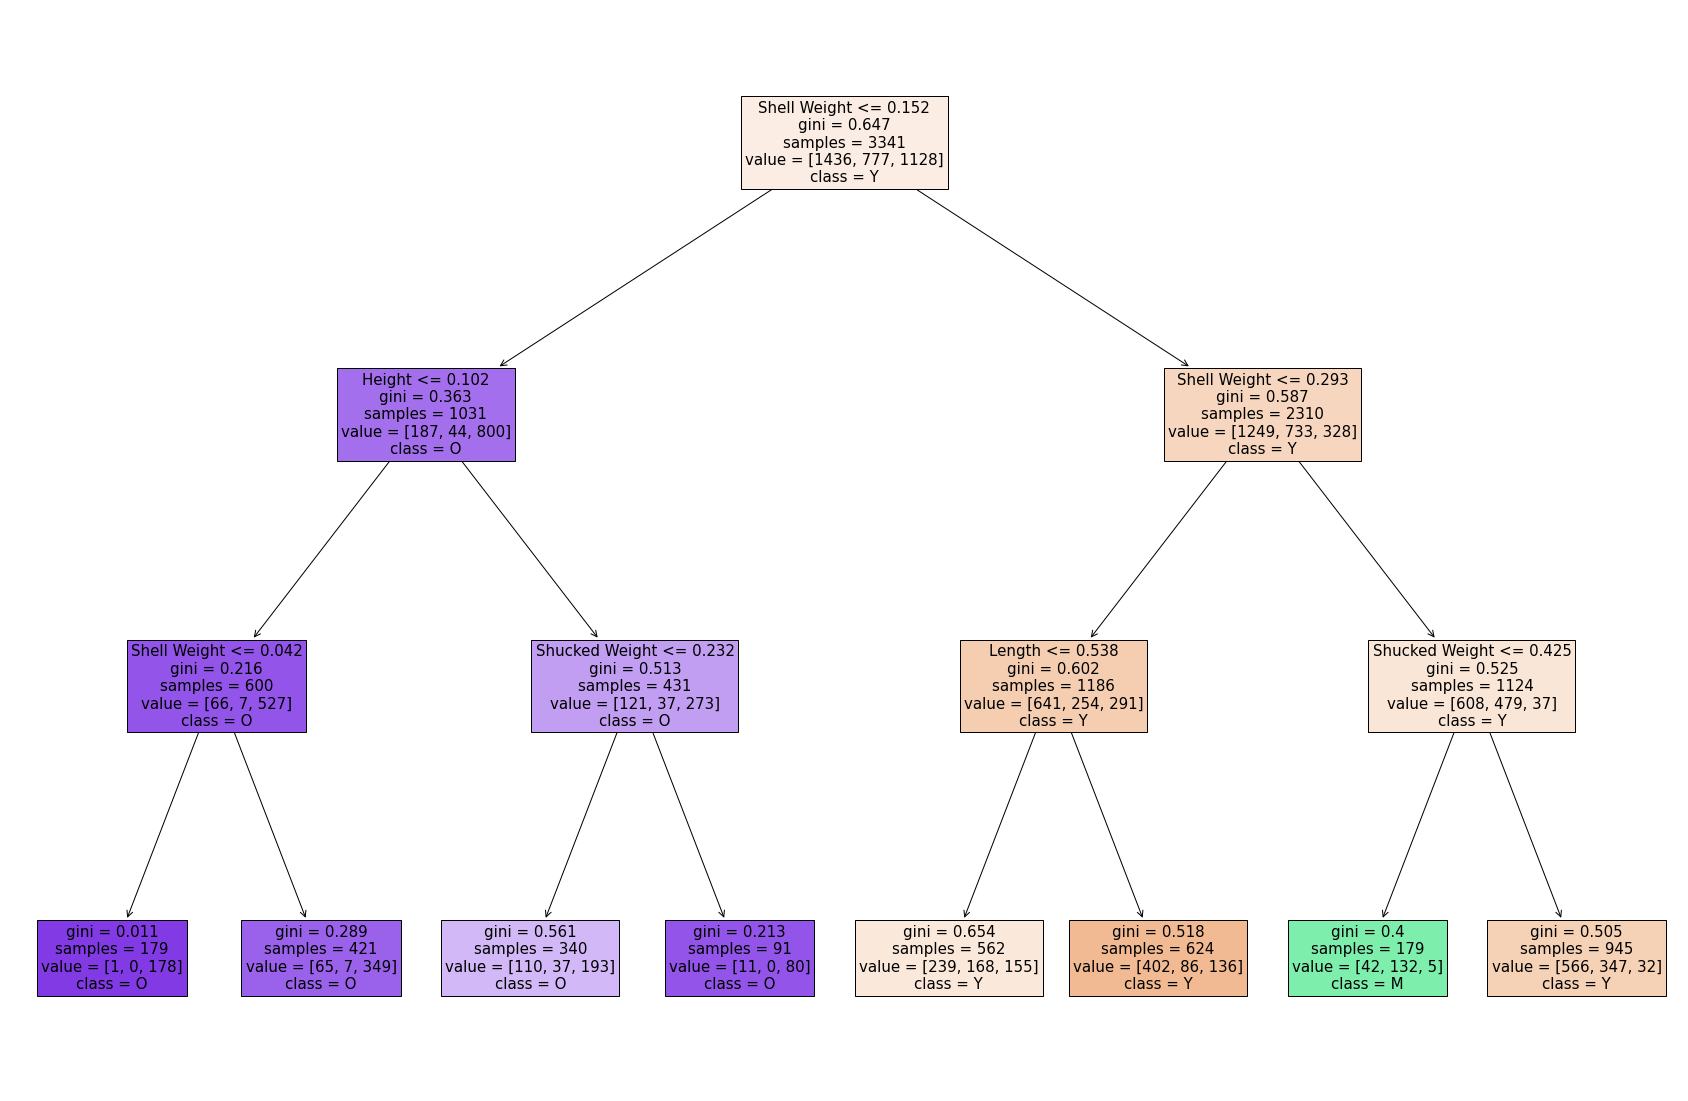

Tree 2 classification report:
              precision    recall  f1-score   support

           M       0.57      0.82      0.67       374
           O       0.70      0.17      0.27       183
           Y       0.75      0.67      0.71       279

    accuracy                           0.63       836
   macro avg       0.67      0.55      0.55       836
weighted avg       0.66      0.63      0.60       836





						  Tree 3


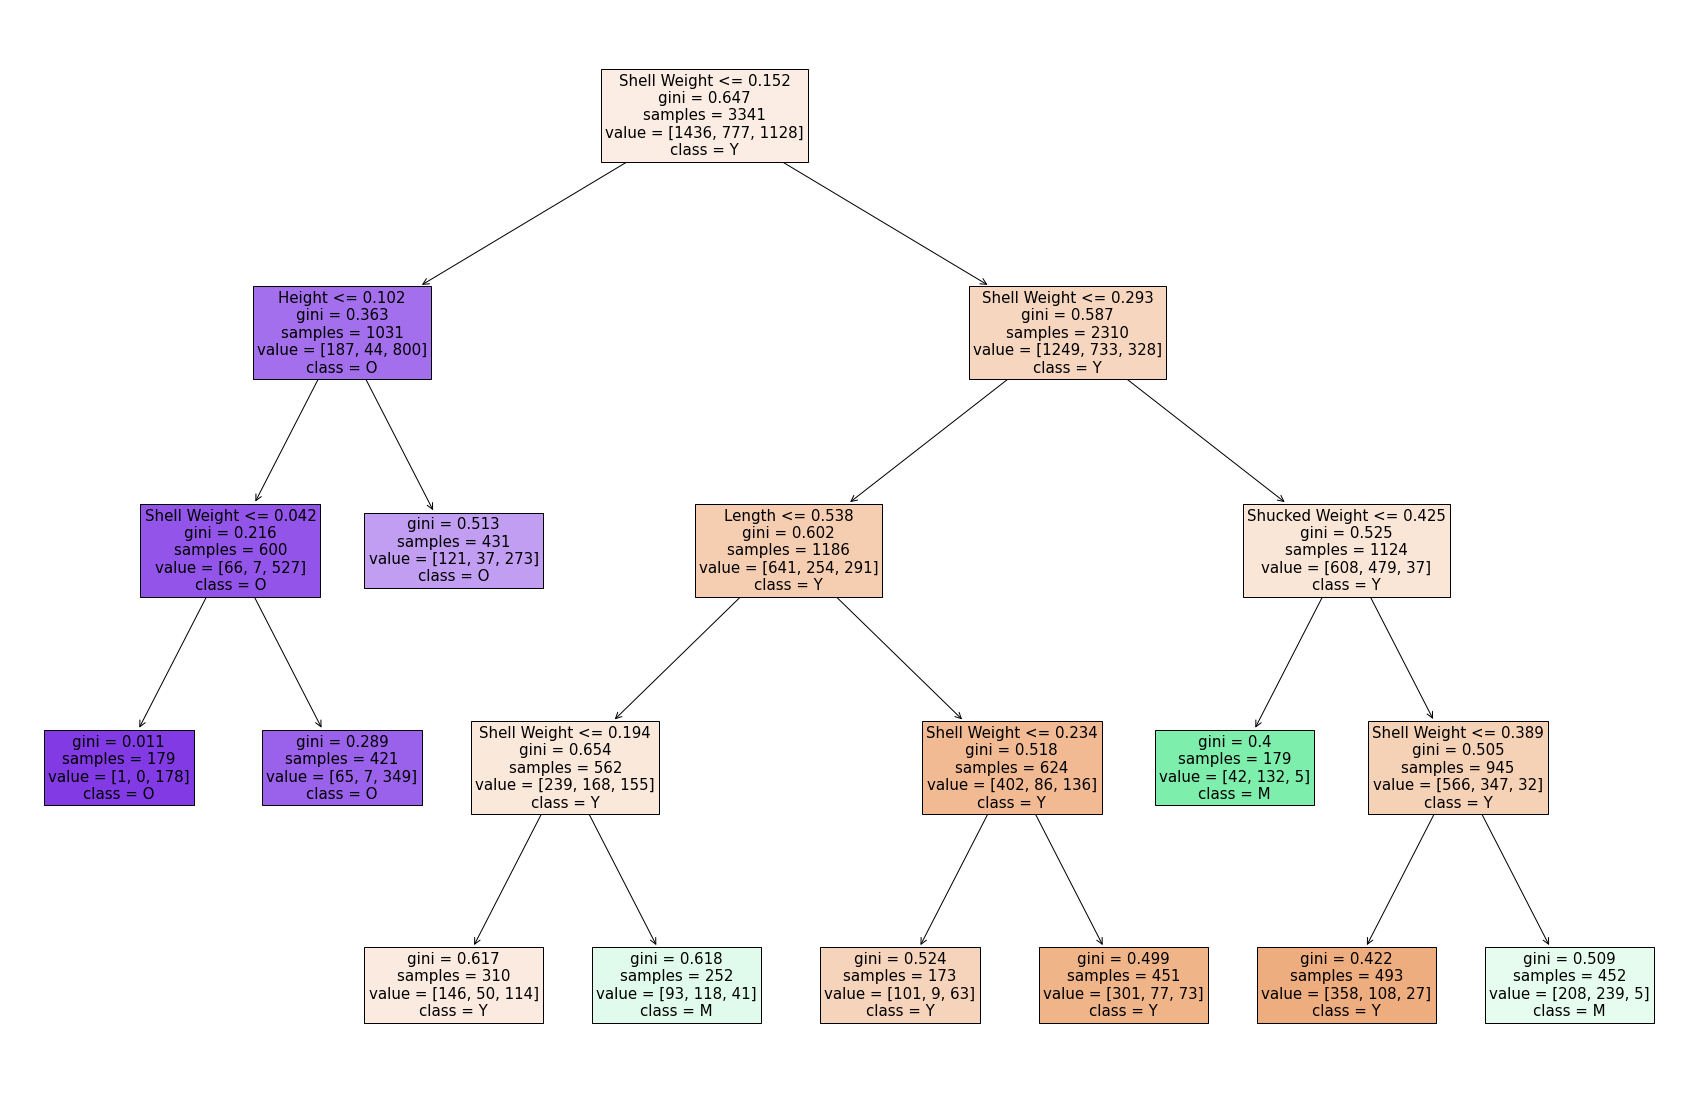

Tree 3 classification report:
              precision    recall  f1-score   support

           M       0.61      0.59      0.60       374
           O       0.50      0.62      0.55       183
           Y       0.75      0.67      0.71       279

    accuracy                           0.62       836
   macro avg       0.62      0.63      0.62       836
weighted avg       0.63      0.62      0.63       836



In [12]:
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw a classification tree
from sklearn.model_selection import train_test_split #to split data into training and test sets
from sklearn.metrics import classification_report


X = ab.loc[:,list(ab.columns)[1:8]] #our independent variables
y = ab[["Age"]] #our dependent variable
X.dtypes

#now we split the data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#now we produce our tree objects
#TREE 1
prelimTree = DecisionTreeClassifier(min_samples_split = 1000)
prelimTree = prelimTree.fit(X_train, y_train)
y_pred = prelimTree.predict(X_test) 
#now we show it
plt.figure(figsize = (30,20))
plot_tree(prelimTree, class_names = ["Y","M","O"], feature_names = X.columns,
           fontsize = 15,
          filled = True)
print("\t\t\t\t\t\tTree 1")
plt.show()
print("Tree 1 classification report:",classification_report(y_test, y_pred), sep = "\n")
print("\n\n\n")



#TREE 2
prelimTree = DecisionTreeClassifier(max_depth = 3)
prelimTree = prelimTree.fit(X_train, y_train)
y_pred = prelimTree.predict(X_test) 
#now we show it
plt.figure(figsize = (30,20))
plot_tree(prelimTree, class_names = ["Y","M","O"], feature_names = X.columns,
           fontsize = 15,
          filled = True)
print("\t\t\t\t\t\t\t  Tree 2")
plt.show()
print("Tree 2 classification report:",classification_report(y_test, y_pred), sep = "\n")
print("\n\n\n")



#TREE 3
prelimTree = DecisionTreeClassifier(max_depth = 4, min_samples_split = 500, min_impurity_decrease = 0.001)
prelimTree = prelimTree.fit(X_train, y_train)
y_pred = prelimTree.predict(X_test) 
#now we show it
plt.figure(figsize = (30,20))
plot_tree(prelimTree, class_names = ["Y","M","O"], feature_names = X.columns,
           fontsize = 15,
          filled = True)
print("\t\t\t\t\t\t  Tree 3")
plt.show()
print("Tree 3 classification report:",classification_report(y_test, y_pred), sep = "\n")

### Discussion:
Tree 1 was produced by requiring that a node must have at least 1000 samples within it in order to be split again.
Tree 2 was produced by limiting the depth of the tree to 3, i.e. three layers of splitting, i.e. four levels of nodes.
Tree 3 was produced by limiting the depth of the tree to 4, requiring that a node must have at least 500 samples within it in order to be split again, and by requiring that a split must result in at least a 0.001 decrease in impurity. 

The macro testing accuracy averages for the three trees were 67%, 67%, and 62%, respectively.

The decision trees all show that the Shell Weight is the most important factor when determining if a sample is either Old or Young/Medium, and that the Shucked Weight is important when it comes to splitting the Young/Medium into either Young or Medium. The other attributes appear to have less impact - if I had more time to work on this I would be interested in reducing the dimensionality of the data to just the Shell Weight and Shucked Weight so as to re-perform the decision tree production and see if this improves accuracy.

***
# Conclusion:

According to the attribute coefficients obtained from the Multivariate Linear Regression the Whole Weight and the Shucked Weight are the two most important attributes for predicting the number of Rings on an abalone. According to the decision trees the most important attributes for determining the Age class of an abalone are the Shell Weight and the Shucked Weight. 

Note: I ran out of time - hence the sparse interpretations. I'm hoping for an extension to fill them out more. 